In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import numpy as np
import scipy as sp
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm 
from fitter import Fitter, get_common_distributions, get_distributions
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Louisana tank farms raw data.xlsx")
df.head()

,tank_id,farm_type,region,imaging_time,image_time_round_day,max_vol,fill_pct,tank volume,scene_id,provider_scene_id,scene_source_id,Location,tank_id.1,tank farm
0,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,29303.75857,0.674951,19778.589167,054895439010_01_P001---207001019EF1E200,1050410004C66C00,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
1,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,29303.75857,0.674951,19778.589167,054895439020_01_P001---207001019EF49600,105041000F777600,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
2,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:53:00.000000,2014-01-22,29303.75857,0.656844,19247.986367,054895439030_01_P001---207001019EF99A00,105041000F777700,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
3,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-04-15T12:11:52.000000,2014-04-15,29303.75857,0.925999,27135.248635,054904655030_01_P001---20700101A28D6000,103001002E9A9F00,WV02,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
4,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-05-23T12:09:16.000000,2014-05-23,29303.75857,0.189657,5557.656339,054895447020_01_P001---207001019EF4C100,103001003239E500,WV02,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635


In [3]:
df.shape

(44685, 14)

In [4]:
df_unique = df.drop_duplicates(subset=['tank_id.1'])
df_unique.shape

(693, 14)

In [5]:
df_unique.head()

,tank_id,farm_type,region,imaging_time,image_time_round_day,max_vol,fill_pct,tank volume,scene_id,provider_scene_id,scene_source_id,Location,tank_id.1,tank farm
0,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,29303.758570,0.674951,19778.589167,054895439010_01_P001---207001019EF1E200,1050410004C66C00,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
46,3275eb6a-6ee5-4a73-8022-293d315aac1c,TERMINAL,padd3,2014-01-22T10:53:00.000000,2014-01-22,40688.697415,0.218677,8897.667436,054895466050_01_P001---207001019F58CF00,105041000F777700,GE01,POINT(-90.4394813145 29.9835666449),3275eb6a-6ee5-4a73-8022-293d315aac1c,6646
105,4419b405-e81c-4f5d-a946-f58e2dbd1060,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,39526.178881,0.484867,19164.955135,054895466030_01_P001---207001019EFA7200,1050410004C66C00,GE01,POINT(-90.4396936717 29.9830170805),4419b405-e81c-4f5d-a946-f58e2dbd1060,6646
164,44dd2c22-3ef7-4a11-8cba-a0b47b87896b,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,140357.472074,0.390461,54804.073568,054895466030_01_P001---207001019EFA7200,1050410004C66C00,GE01,POINT(-90.4490007389 29.9892274311),44dd2c22-3ef7-4a11-8cba-a0b47b87896b,6646
225,892a8de5-528b-4cdb-83fc-2593e1b96392,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,289609.950466,0.390423,113070.323568,054895466030_01_P001---207001019EFA7200,1050410004C66C00,GE01,POINT(-90.4416993777 29.9893585487),892a8de5-528b-4cdb-83fc-2593e1b96392,6646


In [6]:
def extract_lat_lon(point):
    lon, lat = map(float, point[6:-1].split())
    return lat, lon

df_unique[['Latitude', 'Longitude']] = df_unique['Location'].apply(
    lambda x: pd.Series(extract_lat_lon(x))
)

df_unique.head()

,tank_id,farm_type,region,imaging_time,image_time_round_day,max_vol,fill_pct,tank volume,scene_id,provider_scene_id,scene_source_id,Location,tank_id.1,tank farm,Latitude,Longitude
0,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,29303.758570,0.674951,19778.589167,054895439010_01_P001---207001019EF1E200,1050410004C66C00,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635,29.954144,-90.273353
46,3275eb6a-6ee5-4a73-8022-293d315aac1c,TERMINAL,padd3,2014-01-22T10:53:00.000000,2014-01-22,40688.697415,0.218677,8897.667436,054895466050_01_P001---207001019F58CF00,105041000F777700,GE01,POINT(-90.4394813145 29.9835666449),3275eb6a-6ee5-4a73-8022-293d315aac1c,6646,29.983567,-90.439481
105,4419b405-e81c-4f5d-a946-f58e2dbd1060,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,39526.178881,0.484867,19164.955135,054895466030_01_P001---207001019EFA7200,1050410004C66C00,GE01,POINT(-90.4396936717 29.9830170805),4419b405-e81c-4f5d-a946-f58e2dbd1060,6646,29.983017,-90.439694
164,44dd2c22-3ef7-4a11-8cba-a0b47b87896b,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,140357.472074,0.390461,54804.073568,054895466030_01_P001---207001019EFA7200,1050410004C66C00,GE01,POINT(-90.4490007389 29.9892274311),44dd2c22-3ef7-4a11-8cba-a0b47b87896b,6646,29.989227,-90.449001
225,892a8de5-528b-4cdb-83fc-2593e1b96392,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,289609.950466,0.390423,113070.323568,054895466030_01_P001---207001019EFA7200,1050410004C66C00,GE01,POINT(-90.4416993777 29.9893585487),892a8de5-528b-4cdb-83fc-2593e1b96392,6646,29.989359,-90.441699


In [7]:
df_unique.shape

(693, 16)

In [8]:
df_unique2 = df.drop_duplicates(subset=['tank farm'])

df_unique2['tank farm'] = pd.to_numeric(df_unique2['tank farm'], errors='coerce')

df_unique2_sort = df_unique2.sort_values(by=['tank farm'])

df_unique2.shape
print(df_unique2_sort['tank farm'])

0        6635.0
46       6646.0
639      6647.0
746      6655.0
814      6670.0
832      6675.0
847      6676.0
928      6678.0
937      6685.0
1028     6690.0
1122     6697.0
1377     8337.0
1771     8346.0
4143     8347.0
5020     8426.0
9787     8723.0
12173    8816.0
18431    8847.0
21079    9123.0
24032    9294.0
25312    9325.0
29600    9456.0
31487    9457.0
32610    9502.0
33134    9526.0
37360    9597.0
39124    9648.0
42467       NaN
Name: tank farm, dtype: float64


In [9]:
color_map = {
    6635:'',
    6646:'',
    6647:'',
    6655:'',
    6670:'',
    6675:'',
    6676:'',
    6678:'',
    6685:'',
    6690:'',
    6697:'',
    8337:'',
    8346:'',
    8347:'',
    8426:'',
    8723:'',
    8816:'',
    8847:'',
    9123:'',
    9294:'',
    9325:'',
    9456:'',
    9457:'',
    9502:'',
    9526:'',
    9597:'',
    9648:'',
    'undefined':'black'
}

unassigned_colors_count = sum(1 for color in color_map.values() if color == '')

unique_colors = plt.cm.get_cmap('hsv', unassigned_colors_count)

color_index = 0
for key in color_map:
    if color_map[key] == '':
        color_map[key] = plt.colors.to_hex(unique_colors(color_index))
        color_index += 1

print(color_map)

AttributeError: module 'matplotlib.pyplot' has no attribute 'colors'

In [ ]:
m = folium.Map(location=[31.293100, -92.463280], zoom_start=7)

for _, row in df_unique.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color_map[row['tank farm']],
        fill=True,
        fill_color=color_map[row['tank farm']],
        popup=f'Tank Farm: {row["tank farm"]}'
    ).add_to(m)
m

## Data Cleaning

In [10]:
df = pd.read_excel("Louisana tank farms raw data.xlsx")

In [11]:
df

,tank_id,farm_type,region,imaging_time,image_time_round_day,max_vol,fill_pct,tank volume,scene_id,provider_scene_id,scene_source_id,Location,tank_id.1,tank farm
0,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,29303.75857,0.674951,19778.589167,054895439010_01_P001---207001019EF1E200,1050410004C66C00,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
1,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:51:57.000000,2014-01-22,29303.75857,0.674951,19778.589167,054895439020_01_P001---207001019EF49600,105041000F777600,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
2,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-01-22T10:53:00.000000,2014-01-22,29303.75857,0.656844,19247.986367,054895439030_01_P001---207001019EF99A00,105041000F777700,GE01,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
3,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-04-15T12:11:52.000000,2014-04-15,29303.75857,0.925999,27135.248635,054904655030_01_P001---20700101A28D6000,103001002E9A9F00,WV02,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
4,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,padd3,2014-05-23T12:09:16.000000,2014-05-23,29303.75857,0.189657,5557.656339,054895447020_01_P001---207001019EF4C100,103001003239E500,WV02,POINT(-90.2733526074 29.9541444241),351d7f50-2946-4481-9db6-f146fc3e6436,6635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44680,fe7194f0-0c81-47df-abe9-6a1d12d051bd,TERMINAL,padd3,2017-01-07T10:57:48.000000,2017-01-07,28021.37331,0.854425,23942.157379,ASTRIUM_20170107_1657483_ORT_2135944101-002,DS_PHR1A_201701071657483_FR1_PX_W094N30_0905_0...,PHR1A,POINT(-93.3118548988999 30.1851320158024),fe7194f0-0c81-47df-abe9-6a1d12d051bd,undefined
44681,fe7194f0-0c81-47df-abe9-6a1d12d051bd,TERMINAL,padd3,2017-04-01T12:01:51.000000,2017-04-01,28021.37331,0.777718,21792.725503,ASTRIUM_20170401_1701519_ORT_2253299101-002,DS_PHR1B_201704011701519_FR1_PX_W094N30_0905_0...,PHR1B,POINT(-93.3118548988999 30.1851320158024),fe7194f0-0c81-47df-abe9-6a1d12d051bd,undefined
44682,fe7194f0-0c81-47df-abe9-6a1d12d051bd,TERMINAL,padd3,2017-04-20T12:05:07.000000,2017-04-20,28021.37331,0.718786,20141.373856,ASTRIUM_20170420_1705070_ORT_2274882101-002,DS_PHR1B_201704201705070_FR1_PX_W094N30_0905_0...,PHR1B,POINT(-93.3118548988999 30.1851320158024),fe7194f0-0c81-47df-abe9-6a1d12d051bd,undefined
44683,fe7194f0-0c81-47df-abe9-6a1d12d051bd,TERMINAL,padd3,2017-04-27T12:01:59.000000,2017-04-27,28021.37331,0.831297,23294.079455,ASTRIUM_20170427_1701596_ORT_2284727101-002,DS_PHR1B_201704271701596_FR1_PX_W094N30_0905_0...,PHR1B,POINT(-93.3118548988999 30.1851320158024),fe7194f0-0c81-47df-abe9-6a1d12d051bd,undefined


In [12]:
#Check for missing or anomalous data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44685 entries, 0 to 44684
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tank_id               44685 non-null  object        
 1   farm_type             44685 non-null  object        
 2   region                44685 non-null  object        
 3   imaging_time          44685 non-null  object        
 4   image_time_round_day  44685 non-null  datetime64[ns]
 5   max_vol               44685 non-null  float64       
 6   fill_pct              44685 non-null  float64       
 7   tank volume           44685 non-null  float64       
 8   scene_id              44685 non-null  object        
 9   provider_scene_id     44685 non-null  object        
 10  scene_source_id       44685 non-null  object        
 11  Location              44685 non-null  object        
 12  tank_id.1             44685 non-null  object        
 13  tank farm       

In [13]:
#Drop unnecessary columns
df.drop(['tank_id.1', 'region', 'scene_id', 'provider_scene_id', 'scene_source_id'], axis=1, inplace=True)

#Rename column namespace to _ instead of a space
df.rename(columns={'tank volume': 'tank_volume', 'tank farm': 'tank_farm'}, inplace=True)

In [14]:
#Show duplicate rows based on column tank_id and imaging_time
duplicate_rows = df.duplicated(subset=['tank_id', 'imaging_time'])

#Drop the duplicates
df.drop_duplicates(subset=['tank_id', 'imaging_time'], inplace=True)

In [15]:
df_undefined = df[df['tank_farm'] == 'undefined']
df_undefined.drop_duplicates(subset=['tank_id'], inplace=True)

def extract_lat_lon(point):
    lon, lat = map(float, point[6:-1].split())
    return lat, lon

df_undefined[['Latitude', 'Longitude']] = df_undefined['Location'].apply(
    lambda x: pd.Series(extract_lat_lon(x))
)

In [16]:
df_undefined

,tank_id,farm_type,imaging_time,image_time_round_day,max_vol,fill_pct,tank_volume,Location,tank_farm,Latitude,Longitude
42467,0017ffca-6b06-4c8a-a787-7893441c3bf0,TERMINAL,2014-06-30T12:08:56.000000,2014-06-30,42886.151339,0.917884,39364.508191,POINT(-93.2766455411996 30.2389509161094),undefined,30.238951,-93.276646
42518,01b8a7e6-e52f-4f97-93f6-951829a3cbb2,TERMINAL,2014-11-09T11:31:15.000000,2014-11-09,11880.424285,0.279558,3321.269444,POINT(-93.3291658758996 30.1830777895094),undefined,30.183078,-93.329166
42566,07af47b8-0f68-4a45-a412-73a6c94dd3f2,TERMINAL,2017-01-22T10:43:02.000000,2017-01-22,463903.061539,0.469397,217754.823918,POINT(-90.2707314490769 29.4531073221966),undefined,29.453107,-90.270731
42607,081b0e2d-8d0b-4b97-9835-a1d6fb7e8016,TERMINAL,2014-01-22T10:53:00.000000,2014-01-22,10456.411101,0.520560,5443.189214,POINT(-90.4034672677802 30.0108821580925),undefined,30.010882,-90.403467
42683,0fe3e0a3-74e2-4116-b7e9-ae88661745a5,TERMINAL,2016-12-19T10:50:30.000000,2016-12-19,298084.487323,0.839101,250122.869648,POINT(-90.8612734078957 29.9939082601063),undefined,29.993908,-90.861273
42693,172b830d-f6ba-46ea-8e32-90eba90633f0,TERMINAL,2014-11-09T11:31:15.000000,2014-11-09,147842.681527,0.930360,137546.979245,POINT(-93.3375719189999 30.1749532061023),undefined,30.174953,-93.337572
42741,1807da43-44b6-4074-951e-0df0ea104b68,TERMINAL,2014-11-09T11:31:15.000000,2014-11-09,12249.120374,0.680981,8341.423513,POINT(-93.3289164304996 30.1828552071094),undefined,30.182855,-93.328916
42793,1c8122cf-244d-42c2-bb4c-3922dbccdbcc,TERMINAL,2015-08-01T11:47:16.000000,2015-08-01,409624.286363,0.946686,387785.553797,POINT(-90.8612114981437 30.0239521491993),undefined,30.023952,-90.861211
42830,1f4a7c4e-f6f0-4f56-b14e-61d33d000611,TERMINAL,2014-01-18T11:16:57.000000,2014-01-18,71123.983912,0.684972,48717.959302,POINT(-91.1721320449975 30.4826468283011),undefined,30.482647,-91.172132
42910,26bb1b69-7609-4d58-8af8-6fdf4eb7c497,TERMINAL,2014-11-09T11:31:15.000000,2014-11-09,11561.196801,0.879524,10168.353673,POINT(-93.3286616205996 30.1826048013094),undefined,30.182605,-93.328662


In [17]:
#Map of all 'undefined' tanks
m = folium.Map(location=[31.293100, -92.463280], zoom_start=7)

for _, row in df_undefined.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        #color=color_map[row['tank farm']],
        fill=True,
        #fill_color=color_map[row['tank farm']],
        popup=f'Tank Id: {row["tank_id"]}'
    ).add_to(m)
m

In [18]:
#Assign all undefined values in tank_farm to a value based on location
tank_farm_8347 = ['9413aeca-65fa-480e-8922-12413f329db4', '311d452a-d994-420f-bd0b-ca0095c42578', 
                  '6aed5225-c9f5-44c7-881e-5a007ccf5c8f', '9a26ae81-ff77-49a0-b4b9-14dd116028b5',
                  '7aabe444-7d16-4b65-a6fe-1edff327c22b', 'eb12562a-3149-4b5d-bf79-7b4b1c46b157',
                  '07af47b8-0f68-4a45-a412-73a6c94dd3f2', 'c0892763-edc6-4294-81e9-af791ee3f699',
                  'addb0902-d48c-4c0a-9606-fdf83c512c59']

tank_farm_9294 = ['e7540968-2382-48d7-aa3f-2b5108a26db1', '5d261c13-c934-4bec-a0fd-894b3b93b3aa']

tank_farm_9325 = ['7567109f-5c72-4fb0-bd29-d5242a620b70', '6d558180-c721-4e38-88ce-b17827046554']

tank_farm_8816 = ['7ee5bacc-8a43-4168-8ed2-02fa676f848c', 'c29599bf-bda1-41b3-9114-7ad0289865c0',
                  '081b0e2d-8d0b-4b97-9835-a1d6fb7e8016', 'da5059bd-2aa4-48da-a5bb-deb2fd4bd6b6']

tank_farm_8847 = ['b758912e-84e8-441e-a471-13822cfb2a19', '8798b760-2692-4810-a9d9-fe148481436e',
                  'aa95a4b9-01ed-4f3e-ac3e-81631ba91ad3']

tank_farm_8426 = ['1c8122cf-244d-42c2-bb4c-3922dbccdbcc', 'e513fc98-8c13-4573-a824-ef0236d83995',
                  'bc5437aa-d239-4f25-976e-ac381f95013a', 'a304ebd2-06e7-434c-ac34-57da2951c0b9',
                  'eb72d52a-4556-486c-9bab-d18aa0ab468c', '5065fce3-7a77-444d-b2c8-700f1b4b3265',
                  '5cf1c51d-8889-4e91-9513-a88f65c8e0be', '0fe3e0a3-74e2-4116-b7e9-ae88661745a5',
                  '6803b01f-2fc3-476b-a4f3-58bc76583e19', 'a87b5eb5-64de-4492-9da0-778196bca0f3',
                  '405c29c6-3885-4f39-8cae-8ba3d898ff0f', 'b5ac7800-2a51-4970-b791-0e6226ab6e5e',
                  '6b9c1f04-be3a-41fc-93a1-b972aba94e28']

tank_farm_9526 = ['37a808b1-491e-4a18-9823-0b0988faf6ab', '1f4a7c4e-f6f0-4f56-b14e-61d33d000611']

tank_farm_9456 = ['e5348cb2-c06b-4e73-864f-a3d3a1d19d6d']

tank_farm_6675 = ['2b36aade-f7a4-4407-bab1-32cd820e9a97']

tank_farm_8337 = ['92936121-ef05-448a-932c-c3aff80b1fca']

tank_farm_9597 = ['0017ffca-6b06-4c8a-a787-7893441c3bf0']

tank_farm_9648 = ['01b8a7e6-e52f-4f97-93f6-951829a3cbb2', '57e31d29-b532-43af-819a-ba12d21a5e08',
                  '1807da43-44b6-4074-951e-0df0ea104b68', '820bc924-224a-4809-8f14-f798bc541047',
                  '26bb1b69-7609-4d58-8af8-6fdf4eb7c497', '3dd24217-cf05-4aeb-befb-11ed832e449c',
                  '172b830d-f6ba-46ea-8e32-90eba90633f0', '2f6dc5b0-ee24-49ec-bdb6-2e8d98bee62e']


for index, row in df.iterrows():
    tank_id = row['tank_id']
    farm = row['tank_farm']
    
    if tank_id in tank_farm_8347:
        df.at[index, 'tank_farm'] = 8347
        
    if tank_id in tank_farm_9294:
        df.at[index, 'tank_farm'] = 9294
        
    if tank_id in tank_farm_9325:
        df.at[index, 'tank_farm'] = 9325
        
    if tank_id in tank_farm_8816:
        df.at[index, 'tank_farm'] = 8816
        
    if tank_id in tank_farm_8847:
        df.at[index, 'tank_farm'] = 8847
        
    if tank_id in tank_farm_8426:
        df.at[index, 'tank_farm'] = 8426
    
    if tank_id in tank_farm_9526:
        df.at[index, 'tank_farm'] = 9526
        
    if tank_id in tank_farm_9456:
        df.at[index, 'tank_farm'] = 9456
        
    if tank_id in tank_farm_6675:
        df.at[index, 'tank_farm'] = 6675
        
    if tank_id in tank_farm_8337:
        df.at[index, 'tank_farm'] = 8337
        
    if tank_id in tank_farm_9597:
        df.at[index, 'tank_farm'] = 9597
        
    if tank_id in tank_farm_9648:
        df.at[index, 'tank_farm'] = 9648

In [19]:
#Drop irrelevant tank_id's
tank_id_drop = ['f711bbc6-b102-44d0-84c3-0faaf969f637', '7fb3770f-22b5-4977-bafb-4dd89cb7c9b6',
                '9757f635-78ce-493a-9549-666cf06c124a', 'bf6b1963-04b5-488b-8bdb-83a46274a9d6',
                'fe7194f0-0c81-47df-abe9-6a1d12d051bd']

df = df[~df['tank_id'].isin(tank_id_drop)]

In [20]:
#Check if there are still any 'undefined' values
print(df[df['tank_farm'] == 'undefined'])

Empty DataFrame
Columns: [tank_id, farm_type, imaging_time, image_time_round_day, max_vol, fill_pct, tank_volume, Location, tank_farm]
Index: []


In [21]:
df

,tank_id,farm_type,imaging_time,image_time_round_day,max_vol,fill_pct,tank_volume,Location,tank_farm
0,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,2014-01-22T10:51:57.000000,2014-01-22,29303.75857,0.674951,19778.589167,POINT(-90.2733526074 29.9541444241),6635
2,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,2014-01-22T10:53:00.000000,2014-01-22,29303.75857,0.656844,19247.986367,POINT(-90.2733526074 29.9541444241),6635
3,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,2014-04-15T12:11:52.000000,2014-04-15,29303.75857,0.925999,27135.248635,POINT(-90.2733526074 29.9541444241),6635
4,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,2014-05-23T12:09:16.000000,2014-05-23,29303.75857,0.189657,5557.656339,POINT(-90.2733526074 29.9541444241),6635
5,351d7f50-2946-4481-9db6-f146fc3e6436,TERMINAL,2014-05-26T11:59:35.000000,2014-05-26,29303.75857,0.404267,11846.550668,POINT(-90.2733526074 29.9541444241),6635
...,...,...,...,...,...,...,...,...,...
44550,eb72d52a-4556-486c-9bab-d18aa0ab468c,TERMINAL,2017-04-08T11:56:57.000000,2017-04-08,274281.50940,0.940354,257921.772397,POINT(-90.8505392074955 29.9977318506062),8426
44551,eb72d52a-4556-486c-9bab-d18aa0ab468c,TERMINAL,2017-10-26T14:44:21.000000,2017-10-26,274281.50940,0.106293,29154.139045,POINT(-90.8505392074955 29.9977318506062),8426
44552,eb72d52a-4556-486c-9bab-d18aa0ab468c,TERMINAL,2017-11-11T10:40:54.000000,2017-11-11,274281.50940,0.527615,144715.131839,POINT(-90.8505392074955 29.9977318506062),8426
44553,eb72d52a-4556-486c-9bab-d18aa0ab468c,TERMINAL,2017-12-12T10:50:51.000000,2017-12-12,274281.50940,0.135071,37047.599033,POINT(-90.8505392074955 29.9977318506062),8426


In [22]:
#2621 rows dropped
df.shape

(42064, 9)

In [23]:
def extract_lat_lon(point):
    lon, lat = map(float, point[6:-1].split())
    return lat, lon

df[['Latitude', 'Longitude']] = df['Location'].apply(
    lambda x: pd.Series(extract_lat_lon(x))
)

In [24]:
#Drop a few more columns
df.drop(['farm_type', 'imaging_time', 'Location'], axis=1, inplace=True)
df

,tank_id,image_time_round_day,max_vol,fill_pct,tank_volume,tank_farm,Latitude,Longitude
0,351d7f50-2946-4481-9db6-f146fc3e6436,2014-01-22,29303.75857,0.674951,19778.589167,6635,29.954144,-90.273353
2,351d7f50-2946-4481-9db6-f146fc3e6436,2014-01-22,29303.75857,0.656844,19247.986367,6635,29.954144,-90.273353
3,351d7f50-2946-4481-9db6-f146fc3e6436,2014-04-15,29303.75857,0.925999,27135.248635,6635,29.954144,-90.273353
4,351d7f50-2946-4481-9db6-f146fc3e6436,2014-05-23,29303.75857,0.189657,5557.656339,6635,29.954144,-90.273353
5,351d7f50-2946-4481-9db6-f146fc3e6436,2014-05-26,29303.75857,0.404267,11846.550668,6635,29.954144,-90.273353
...,...,...,...,...,...,...,...,...
44550,eb72d52a-4556-486c-9bab-d18aa0ab468c,2017-04-08,274281.50940,0.940354,257921.772397,8426,29.997732,-90.850539
44551,eb72d52a-4556-486c-9bab-d18aa0ab468c,2017-10-26,274281.50940,0.106293,29154.139045,8426,29.997732,-90.850539
44552,eb72d52a-4556-486c-9bab-d18aa0ab468c,2017-11-11,274281.50940,0.527615,144715.131839,8426,29.997732,-90.850539
44553,eb72d52a-4556-486c-9bab-d18aa0ab468c,2017-12-12,274281.50940,0.135071,37047.599033,8426,29.997732,-90.850539


In [25]:
df.describe()

,image_time_round_day,max_vol,fill_pct,tank_volume,Latitude,Longitude
count,42064,42064.000000,42064.000000,42064.000000,42064.000000,42064.000000
mean,2016-09-25 14:32:51.167744256,189171.334960,0.553355,109317.958215,30.124637,-90.990346
min,2014-01-18 00:00:00,7196.083461,0.035396,980.608068,29.445149,-93.796697
25%,2016-01-24 00:00:00,68161.435236,0.353886,28336.882035,29.990792,-91.186504
50%,2016-10-21 00:00:00,123953.366203,0.537411,63337.991093,30.029443,-90.852475
75%,2017-08-08 00:00:00,260426.905176,0.759358,134982.288007,30.241362,-90.394661
max,2018-04-05 00:00:00,816298.924484,1.000000,807237.350481,32.950343,-89.936266
std,NaN,174231.043690,0.236704,126578.343938,0.343762,0.999806


## Feature Engineering/Data integration

In [26]:
'''
Implementing risk rating based on fill_pct of tank
1 = Risky, 0 = Not Risky
'''

conditions = [(df['fill_pct'] >= 0.92) | (df['fill_pct'] <= 0.08),]
values = [1]

# Assign default value of 1 for other cases
default_value = 0

# Use np.select() to assign values based on conditions
df['risk'] = np.select(conditions, values, default_value)

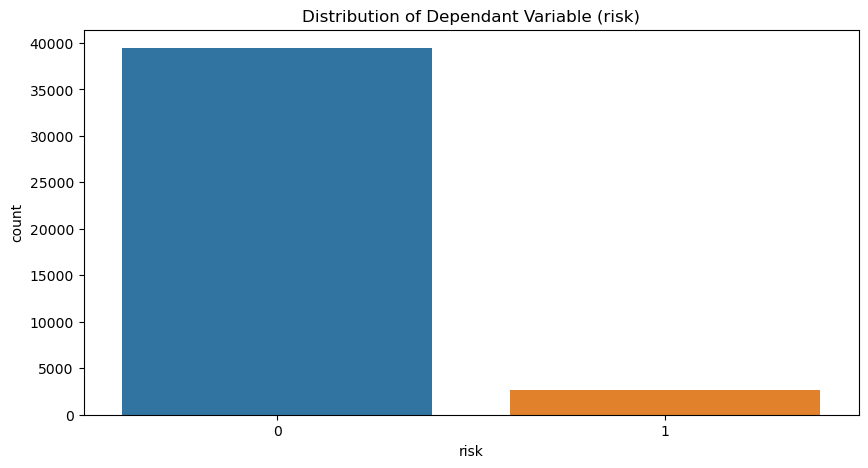

risk
No Risk    39453
Risky       2611
Name: count, dtype: int64
Highly imbalanced dataset, while a good thing overall for safety, not great for classification task


In [138]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['risk'], data=df)
plt.title('Distribution of Dependant Variable (risk)')
plt.show()

class_names = {0:'No Risk', 1:'Risky'}
print(df['risk'].value_counts().rename(index = class_names))

print("Highly imbalanced dataset, while a good thing overall for safety, not great for classification task")

In [28]:
#Convert tank_id to integers via label encoding
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'tank_id' column to numeric values
df['tank_id_encoded'] = label_encoder.fit_transform(df['tank_id'])

df['tank_id'] = df['tank_id_encoded']

df.drop(['tank_id_encoded'], axis=1, inplace=True)

In [29]:
#Extract year, month, day so it can be used in the ML process
df['year'] = df['image_time_round_day'].dt.year
df['month'] = df['image_time_round_day'].dt.month
df['day'] = df['image_time_round_day'].dt.day

df.drop(['image_time_round_day'], axis=1, inplace=True)

In [30]:
col = df.pop('risk')
df['risk'] = col
df

,tank_id,max_vol,fill_pct,tank_volume,tank_farm,Latitude,Longitude,year,month,day,risk
0,153,29303.75857,0.674951,19778.589167,6635,29.954144,-90.273353,2014,1,22,0
2,153,29303.75857,0.656844,19247.986367,6635,29.954144,-90.273353,2014,1,22,0
3,153,29303.75857,0.925999,27135.248635,6635,29.954144,-90.273353,2014,4,15,1
4,153,29303.75857,0.189657,5557.656339,6635,29.954144,-90.273353,2014,5,23,0
5,153,29303.75857,0.404267,11846.550668,6635,29.954144,-90.273353,2014,5,26,0
...,...,...,...,...,...,...,...,...,...,...,...
44550,635,274281.50940,0.940354,257921.772397,8426,29.997732,-90.850539,2017,4,8,1
44551,635,274281.50940,0.106293,29154.139045,8426,29.997732,-90.850539,2017,10,26,0
44552,635,274281.50940,0.527615,144715.131839,8426,29.997732,-90.850539,2017,11,11,0
44553,635,274281.50940,0.135071,37047.599033,8426,29.997732,-90.850539,2017,12,12,0


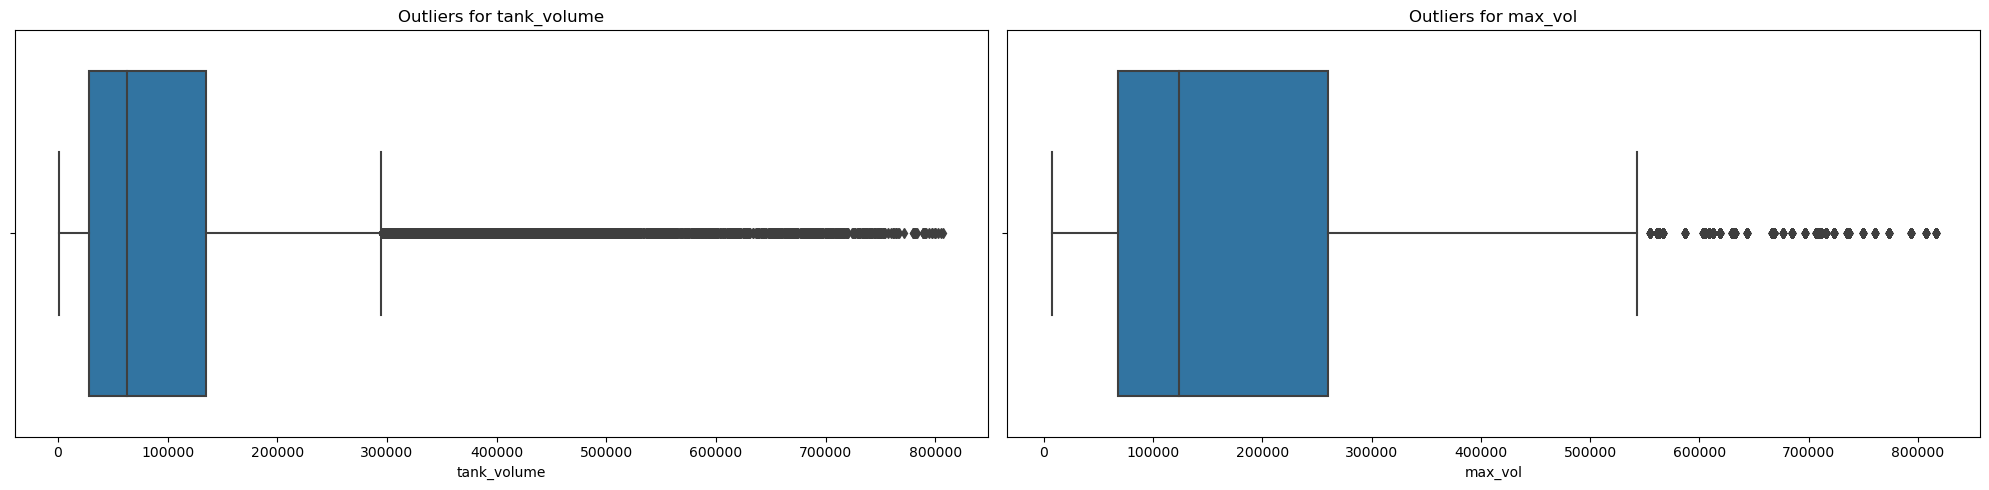

In [148]:
plt.figure(figsize=(20, 5))

# First subplot for 'tank_volume'
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
sns.boxplot(x=df['tank_volume'])
plt.title('Outliers for tank_volume')

# Second subplot for 'max_vol'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['max_vol'])
plt.title('Outliers for max_vol')

# Display the combined plot
plt.tight_layout()
plt.show()

In [34]:
Q1 = df['tank_volume'].quantile(0.25)
Q3 = df['tank_volume'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['tank_volume'] < (Q1 - 1.5 * IQR)) | (df['tank_volume'] > (Q3 + 1.5 * IQR))]

print(outliers)

       tank_id        max_vol  fill_pct    tank_volume tank_farm   Latitude  \
599        655  341706.854157  0.886497  302922.217560      6646  29.990057   
787        541  390847.470958  0.819069  320130.937696      6655  30.161004   
789        541  390847.470958  0.968175  378408.582166      6655  30.161004   
790        541  390847.470958  0.868492  339448.034987      6655  30.161004   
791        541  390847.470958  0.974857  381020.520452      6655  30.161004   
...        ...            ...       ...            ...       ...        ...   
44520      633  458123.882995  0.892630  408934.932534      8347  29.454107   
44521      633  458123.882995  0.889191  407359.747636      8347  29.454107   
44522      633  458123.882995  0.804823  368708.717156      8347  29.454107   
44523      633  458123.882995  0.801123  367013.555633      8347  29.454107   
44526      633  458123.882995  0.856748  392496.615880      8347  29.454107   

       Longitude  year  month  day  risk  
599   -9

In [149]:
Q1 = df['max_vol'].quantile(0.25)
Q3 = df['max_vol'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['max_vol'] < (Q1 - 1.5 * IQR)) | (df['max_vol'] > (Q3 + 1.5 * IQR))]

print(outliers)

       tank_id        max_vol  fill_pct    tank_volume tank_farm  Latitude  \
4143        77  668392.874937  0.491764  328691.453331      8347  29.44522   
4144        77  668392.874937  0.544010  363612.716599      8347  29.44522   
4145        77  668392.874937  0.292139  195263.524829      8347  29.44522   
4146        77  668392.874937  0.627747  419581.668802      8347  29.44522   
4147        77  668392.874937  0.596319  398575.299087      8347  29.44522   
...        ...            ...       ...            ...       ...       ...   
44142      457  696542.116435  0.639017  445102.360970      8347  29.45229   
44143      457  696542.116435  0.634431  441908.081929      8347  29.45229   
44144      457  696542.116435  0.488279  340106.783614      8347  29.45229   
44145      457  696542.116435  0.435440  303302.100958      8347  29.45229   
44146      457  696542.116435  0.575255  400689.020996      8347  29.45229   

       Longitude  year  month  day  risk  
4143  -90.271264  20

In [36]:
result = stats.anderson(df['fill_pct'], dist='norm')
print("Anderson-Darling test statistic: ", result.statistic)
print("Significance levels: ", result.significance_level)
print("Critical values: ", result.critical_values)

#Statistic is greater than the critical value at every significance level,
#we reject the null hypothesis, meaning the sample data is not normally distributed

Anderson-Darling test statistic:  421.2703184772108
Significance levels:  [15.  10.   5.   2.5  1. ]
Critical values:  [0.576 0.656 0.787 0.918 1.092]


In [37]:
# List of distributions to test
distributions = [stats.norm, stats.expon, stats.gamma]

# Perform goodness-of-fit test for each distribution
for distribution in distributions:
    name = distribution.name
    
    # Fit the data to the distribution
    params = distribution.fit(df['fill_pct'])
    
    # Perform the Kolmogorov-Smirnov test
    _, p_value = stats.kstest(df['fill_pct'], distribution.cdf, args=params)
    
    # Print result
    print(f"Goodness-of-fit test for {name}: p-value = {p_value}")


Goodness-of-fit test for norm: p-value = 3.867778463516543e-147
Goodness-of-fit test for expon: p-value = 0.0
Goodness-of-fit test for gamma: p-value = 5.33397394719666e-137


Fitting 111 distributions:   0%|                          | 0/111 [00:00<?, ?it/s]2024-04-22 13:46:32.585 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED _fit distribution (taking more than 30 seconds)
2024-04-22 13:46:32.825 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted anglit distribution with error=31.927867)
Fitting 111 distributions:   4%|▋                 | 4/111 [00:00<00:24,  4.44it/s]2024-04-22 13:46:33.506 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted bradford distribution with error=41.781052)
2024-04-22 13:46:33.685 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted argus distribution with error=33.729969)
Fitting 111 distributions:   6%|█▏                | 7/111 [00:01<00:18,  5.56it/s]2024-04-22 13:46:33.879 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted chi distribution with error=34.388286)
2024-04-22 13:46:34.166 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted dgamm

Fitting 111 distributions:  58%|█████████▊       | 64/111 [01:13<02:49,  3.61s/it]2024-04-22 13:47:45.935 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED ksone distribution (taking more than 30 seconds)
2024-04-22 13:47:46.755 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED kstwo distribution (taking more than 30 seconds)
Fitting 111 distributions:  68%|███████████▍     | 75/111 [01:31<00:54,  1.52s/it]2024-04-22 13:48:04.249 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=32.984333)
2024-04-22 13:48:06.384 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted powernorm distribution with error=34.119578)
Fitting 111 distributions:  72%|████████████▎    | 80/111 [01:42<01:17,  2.49s/it]2024-04-22 13:48:17.446 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED nct distribution (taking more than 30 seconds)
2024-04-22 13:48:17.505 | WARNING  | fitter.fitter:_fit_single_distribut

Fitting 111 distributions:  88%|███████████████  | 98/111 [02:28<00:25,  1.94s/it]2024-04-22 13:49:01.369 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED vonmises_fisher distribution (taking more than 30 seconds)
2024-04-22 13:49:05.273 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted trapz distribution with error=49.583408)
Fitting 111 distributions: 100%|████████████████| 111/111 [03:12<00:00,  1.73s/it]


              sumsquare_error        aic        bic    kl_div  ks_statistic  \
gennorm             27.001151  51.923442  77.864284  0.102217      0.025019   
johnsonsb           29.174729  31.649447  66.237237  0.108882      0.044510   
beta                29.845849  22.621313  57.209103  0.114457      0.049271   
rdist               30.267200  21.710946  47.651789  0.125316      0.054303   
semicircular        30.568391   8.410966  25.704861  0.146530      0.067274   

                  ks_pvalue  
gennorm        2.630333e-23  
johnsonsb      7.441365e-73  
beta           3.484238e-89  
rdist         2.986753e-108  
semicircular  5.766846e-166  


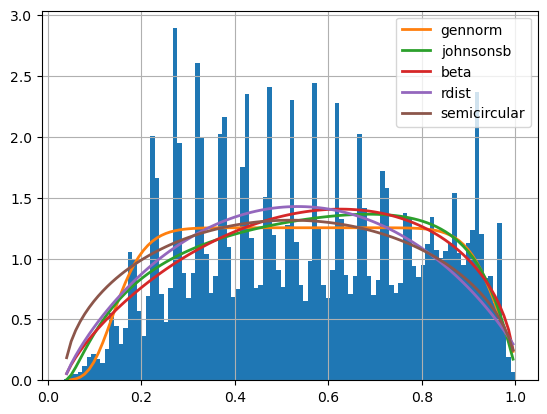

In [150]:
f_fill_pct = Fitter(df['fill_pct'])

f_fill_pct.fit(get_common_distributions())
print(f_fill_pct.summary())

In [151]:
f_fill_pct.get_best(method = 'sumsquare_error')

{'gennorm': {'beta': 9.70575165472879,
  'loc': 0.5524135906250591,
  'scale': 0.4201005097003119}}

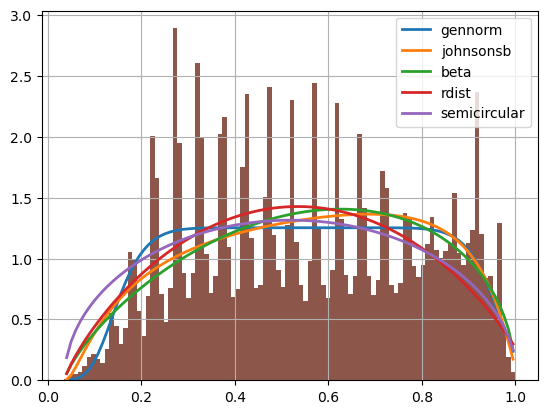

In [163]:
f_fill_pct.plot_pdf()
f_fill_pct.hist()

Fitting 111 distributions:   3%|▍                 | 3/111 [00:30<19:54, 11.06s/it]2024-04-22 13:50:46.599 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED beta distribution (taking more than 30 seconds)
2024-04-22 13:50:46.600 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED arcsine distribution (taking more than 30 seconds)
2024-04-22 13:50:46.611 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED argus distribution (taking more than 30 seconds)
Fitting 111 distributions:   5%|▉                 | 6/111 [00:30<06:35,  3.77s/it]2024-04-22 13:50:46.611 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED betaprime distribution (taking more than 30 seconds)
2024-04-22 13:50:46.618 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED bradford distribution (taking more than 30 seconds)
2024-04-22 13:50:46.625 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED burr distribution (taking more than 30 seco

2024-04-22 13:52:17.226 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED genhalflogistic distribution (taking more than 30 seconds)
Fitting 111 distributions:  30%|█████            | 33/111 [02:01<02:43,  2.10s/it]2024-04-22 13:52:17.312 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED genhyperbolic distribution (taking more than 30 seconds)
2024-04-22 13:52:20.978 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted gumbel_l distribution with error=0.0)
Fitting 111 distributions:  35%|█████▉           | 39/111 [02:30<07:01,  5.85s/it]2024-04-22 13:52:46.953 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED genpareto distribution (taking more than 30 seconds)
2024-04-22 13:52:47.071 | WARNING  | fitter.fitter:_fit_single_distribution:347 - SKIPPED gibrat distribution (taking more than 30 seconds)
Fitting 111 distributions:  43%|███████▎         | 48/111 [03:00<05:45,  5.48s/it]2024-04-22 13:53:17.231 | WARNING  | fitter.fitt

Fitting 111 distributions: 100%|████████████████| 111/111 [06:08<00:00,  3.32s/it]


          sumsquare_error          aic          bic    kl_div  ks_statistic  \
lognorm      3.810572e-12  3007.017561  3032.958404  0.007750      0.011966   
pareto       1.996911e-11  3019.650510  3045.591352  0.017917      0.029647   
expon        2.524973e-11  3066.810449  3084.104344  0.032873      0.065375   
cauchy       1.043561e-10  3124.185911  3141.479806  0.101439      0.204814   
gumbel_r     1.425824e-10  3269.425477  3286.719372  0.152021      0.121893   

              ks_pvalue  
lognorm    1.164512e-05  
pareto     1.492183e-32  
expon     9.597849e-157  
cauchy     0.000000e+00  
gumbel_r   0.000000e+00  


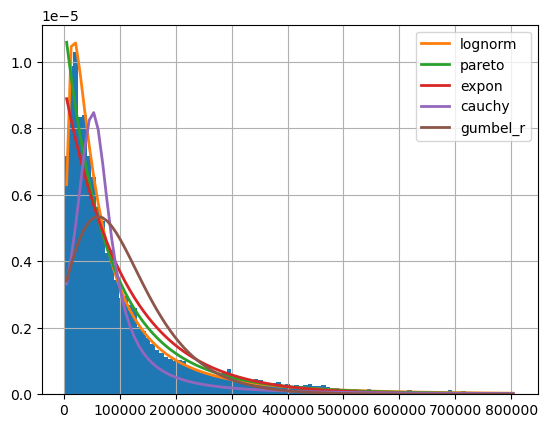

In [152]:
f = Fitter(df['tank_volume'])

f.fit(get_common_distributions())
print(f.summary())

In [153]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 1.1204482187846472,
  'loc': -546.1427361076163,
  'scale': 62047.684564374555}}

In [39]:
result = stats.anderson(df['tank_volume'], dist='logistic')
print("Anderson-Darling test statistic: ", result.statistic)
print("Significance levels: ", result.significance_level)
print("Critical values: ", result.critical_values)

Anderson-Darling test statistic:  2247.970258130059
Significance levels:  [25.  10.   5.   2.5  1.   0.5]
Critical values:  [0.426 0.563 0.66  0.769 0.906 1.01 ]


In [40]:
# Calculate the number of elements in the dataset 'df['fill_pct']'
N = len(df['fill_pct'])

# Calculate the mean (average) of the dataset
mean = sum(df['fill_pct']) / N

# Calculate the standard deviation of the dataset
std = np.sqrt(sum((df['fill_pct'] - mean) ** 2) / N)

# Calculate the skewness of the dataset
skewness = sum((df['fill_pct'] - mean) ** 3) / (N * std ** 3)

# Calculate the kurtosis of the dataset
kurtosis = sum((df['fill_pct'] - mean) ** 4) / (N * std ** 4) - 3

# Print the calculated mean, standard deviation, skewness, and kurtosis
print(f"Mean: {'{:.6f}'.format(mean)}, Std: {'{:.4f}'.format(std)}, Skewness {'{:.4f}'.format(skewness)}, Kurtosis: {'{:.4f}'.format(kurtosis)}")

Mean: 0.553355, Std: 0.2367, Skewness 0.0665, Kurtosis: -1.1295


In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histogram of fill_pct
axes[0, 0].hist(df['fill_pct'], bins=60, edgecolor='black')
axes[0, 0].set_title('Histogram of fill_pct')
axes[0, 0].set_xlabel('Tank Fill (%)')
axes[0, 0].set_ylabel('Frequency')

# Histogram of tank_volume
axes[1, 1].hist(df['tank_volume'], bins=20, edgecolor='black')
axes[1, 1].set_title('Histogram of Tank Volume')
axes[1, 1].set_xlabel('Tank Volume')
axes[1, 1].set_ylabel('Frequency')

# Histogram of max_vol
axes[1, 0].hist(df['max_vol'], bins=20, edgecolor='black')
axes[1, 0].set_title('Histogram of Max Volume')
axes[1, 0].set_xlabel('Max Volume')
axes[1, 0].set_ylabel('Frequency')

# Histogram of months
month_ticks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
axes[0, 1].bar(df['month'], edgecolor='black')
axes[0, 1].set_title('Histogram of Months')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xticks(month_ticks)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

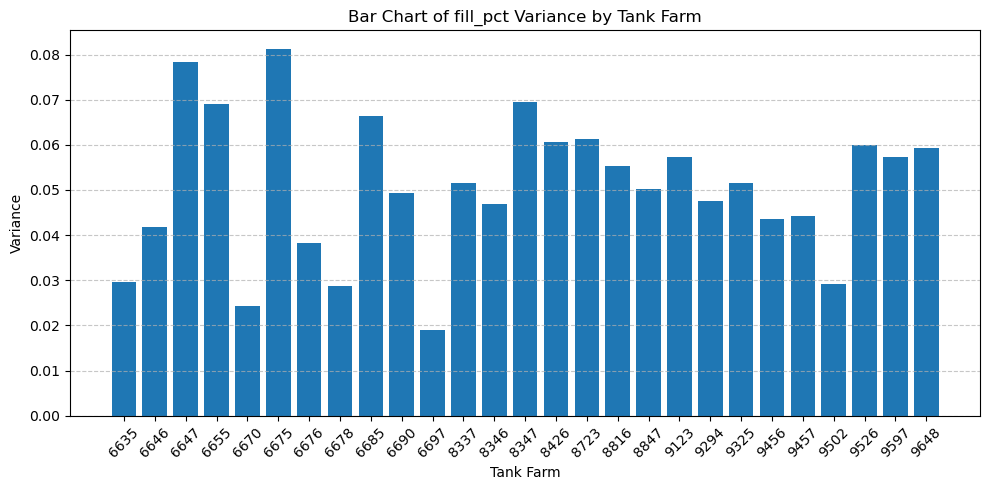

In [42]:
var_by_tank_farm = df.groupby('tank_farm')['fill_pct'].var()
ind = var_by_tank_farm.index.astype(str)
val = var_by_tank_farm.tolist()

plt.figure(figsize=(10,5))
plt.bar(ind, val)
plt.title('Bar Chart of fill_pct Variance by Tank Farm')
plt.xticks(ind, rotation=45)
plt.xlabel('Tank Farm')
plt.ylabel('Variance')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


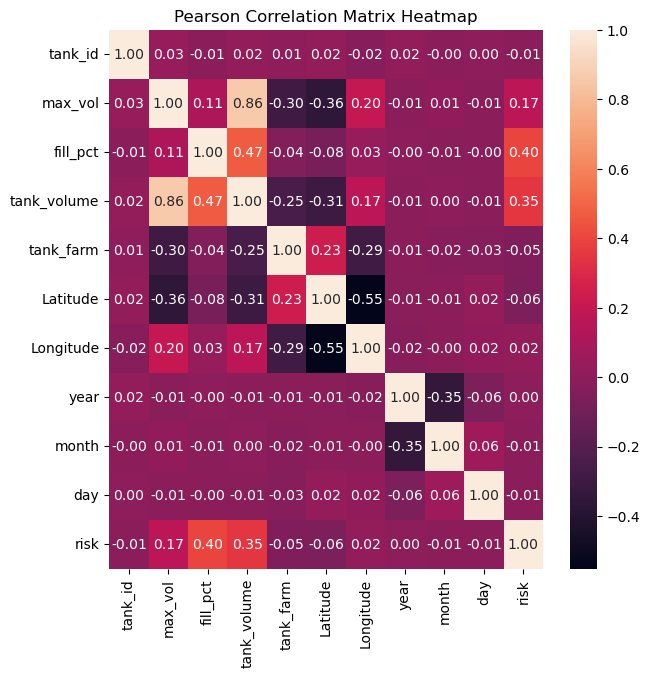

In [43]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(method='pearson'), annot=True, fmt=".2f")
plt.title('Pearson Correlation Matrix Heatmap')
plt.show()

#Especially interested in the "risk" row, showing a decent positive correlation with fill_pct and tank_volume
#A low positive correlation with max_vol

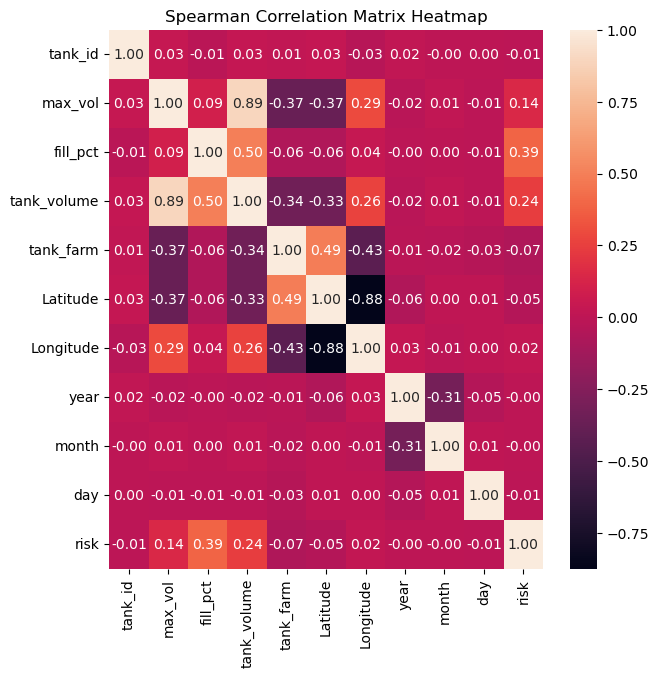

In [44]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt=".2f")
plt.title('Spearman Correlation Matrix Heatmap')
plt.show()

<Figure size 300x300 with 0 Axes>

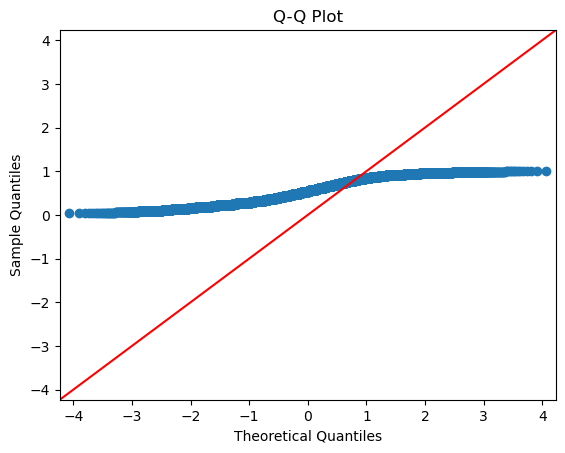

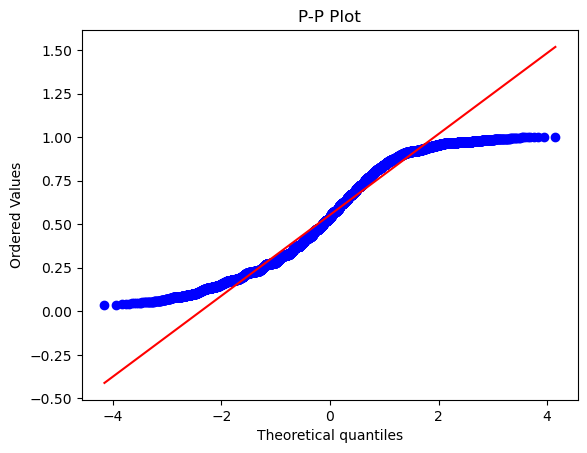

In [45]:
# Q-Q plot
plt.figure(figsize=(3,3))
sm.qqplot(df['fill_pct'], line ='45') # The '45' adds a reference line at 45 degrees which is the y=x line
plt.title('Q-Q Plot')
plt.show()

# P-P plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['fill_pct'], dist="norm", plot=ax)
plt.title('P-P Plot')
plt.show()

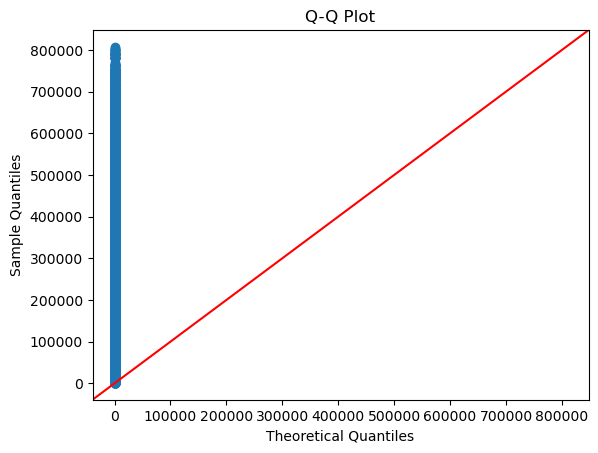

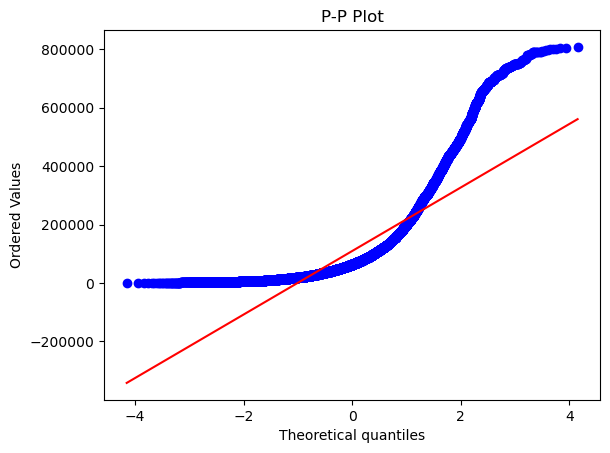

In [46]:
# Q-Q plot
sm.qqplot(df['tank_volume'], line ='45') # The '45' adds a reference line at 45 degrees which is the y=x line
plt.title('Q-Q Plot')
plt.show()

# P-P plot
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['tank_volume'], dist="norm", plot=ax)
plt.title('P-P Plot')
plt.show()

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

X = df.drop(['risk'], axis=1)
y = df['risk']

#Random_state so the results can be reproduced, 
#Stratify to ensure both subsets reflect the class distribution/imbalance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Splitting first helps prevent data leakage issues where information from the test set 
#could inadvertently influence the model training process

### Baseline Comparison

In [72]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy.fit(X_train, y_train)

y_pred_dummy = dummy.predict(X_test)

print("Baseline Model Evaluation:")
print(classification_report(y_test, y_pred_dummy))

Baseline Model Evaluation:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7891
           1       0.00      0.00      0.00       522

    accuracy                           0.94      8413
   macro avg       0.47      0.50      0.48      8413
weighted avg       0.88      0.94      0.91      8413



Precision for class 0: This is very high (0.94), which indicates that when the model predicts 'no risk', it is correct 94% of the time.
Recall for class 0: This is 1.00, which means the model identified all 'no risk' cases correctly. However, since the baseline model predicts 'no risk' for all cases, this is expected.
F1-score for class 0: The high F1-score (0.97) is because of the high precision and recall, but it is artificially inflated since the model only predicts 'no risk'.

### Scaling

In [48]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)

#By scaling the training data independently of the test set,
#we ensure that the model is not biased by any knowledge about the test data’s distribution.

X_test_scaled = scaler.transform(X_test)

#Scaling the test data using the scaler fitted on the training data ensures that the model evaluates 
#the test data under the same conditions as it was trained, which is vital for unbiased performance evaluation.

### Oversampling

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [50]:
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_train_smote))

Original dataset shape 42064
Resampled dataset shape 63124


## Cross-Validation

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


models = []
models.append(LogisticRegression(random_state=42))
models.append(SVC(random_state=42))
models.append(RandomForestClassifier(random_state=42))
models.append(DecisionTreeClassifier(random_state=42))
models.append(KNeighborsClassifier())
models.append(XGBClassifier(random_state=42))

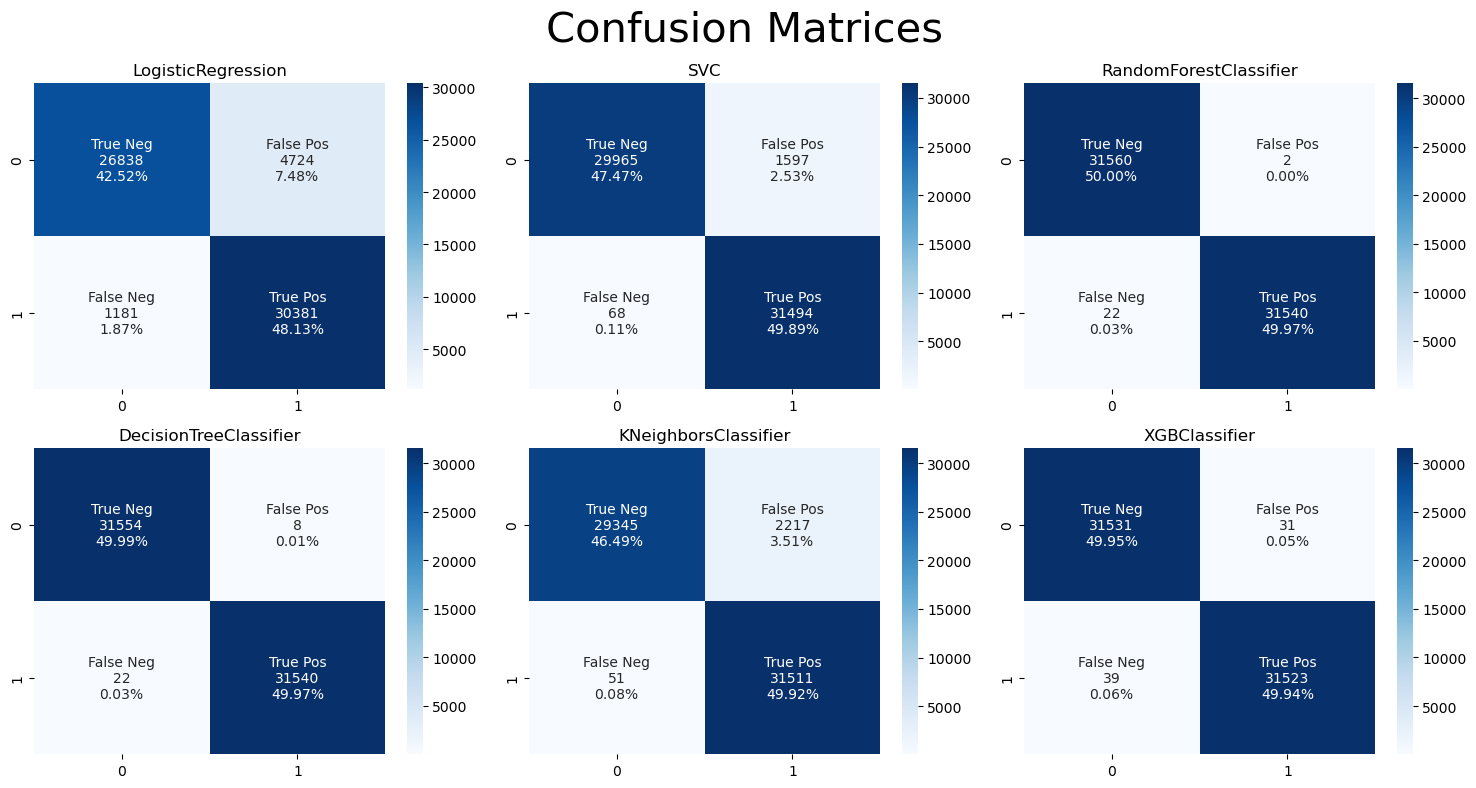

In [66]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

for model, ax in zip(models, axes.flatten()):
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    y_train_pred = cross_val_predict(model, X_train_smote, y_train_smote, cv=kfold)
    cf_matrix = confusion_matrix(y_train_smote, y_train_pred)

    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax=ax) # visual confusion matrix of all models
    ax.title.set_text(type(model).__name__)

#plt.title("Confusion Matrices")
fig.suptitle("Confusion Matrices", fontsize=30)
plt.tight_layout()
plt.show()

We want to minimize the bottom left quadrant (False Neg) as this refers to risky(1) storages falsely classified as not-risky(0) storages. While ideally we want to minimize both False Neg and False Pos, we care more about False Neg as there could be serious safety concerns for wrongly classifying a risky oil storage and not-risky

## Performance Metrics

precision is more important where false positives are more costly than false negatives
recall is more important where false negatives are more costly than false positives

In [68]:
from sklearn.model_selection import cross_val_score

metric_models = []
metric_models.append(('LR', LogisticRegression(random_state=42)))
metric_models.append(('SVC', SVC(random_state=42)))
metric_models.append(('RF', RandomForestClassifier(random_state=42)))
metric_models.append(('DT', DecisionTreeClassifier(random_state=42)))
metric_models.append(('KNN', KNeighborsClassifier()))
metric_models.append(('XGB', XGBClassifier(random_state=42)))

# evaluate each model in turn
# creating a list for the kfold CV metric scores
accuracy_results = []
precision_results = []
recall_results = []
f1_results = []

# creating a list of the average metric scores
avg_accuracy_results = []
avg_precision_results = []
avg_recall_results = []
avg_f1_results = []

names = []

for name, model in metric_models:
        kfold = KFold(n_splits=10, random_state=42, shuffle=True)
        cv_accuracy = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='accuracy')
        cv_precision = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='precision')
        cv_recall = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='recall')
        cv_f1 = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring='f1')
        accuracy_results.append(cv_accuracy)
        precision_results.append(cv_precision)
        recall_results.append(cv_recall)
        f1_results.append(cv_f1)

        avg_accuracy_results.append(cv_accuracy.mean())
        avg_precision_results.append(cv_precision.mean())
        avg_recall_results.append(cv_recall.mean())
        avg_f1_results.append(cv_f1.mean())

        names.append(name)

clf_metrics_data = {
    "Accuracy": avg_accuracy_results,
    "Precision": avg_precision_results,
    "Recall": avg_recall_results,
    "F1": avg_f1_results
}

clf_metrics_df = pd.DataFrame(clf_metrics_data, index=names) # Creating a dataframe of all the metrics for each model
clf_metrics_df.index.name = "Model"

clf_metrics_df

,Accuracy,Precision,Recall,F1
Model,,,,
LR,0.906454,0.865425,0.962592,0.911419
SVC,0.973623,0.951753,0.997838,0.974249
RF,0.999620,0.999937,0.999303,0.999620
DT,0.999525,0.999748,0.999301,0.999525
KNN,0.964071,0.934286,0.998379,0.965268
XGB,0.998891,0.999018,0.998765,0.998891


We emphasize recall over precision

In [97]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

final_model = SVC(random_state=42)
final_model.fit(X_train_smote, y_train_smote)
final_pred = final_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, final_pred)
final_precision = precision_score(y_test, final_pred)
final_recall = recall_score(y_test, final_pred)
final_f1 = f1_score(y_test, final_pred)

print("Model: Support Vector Classifer")
print("Accuracy: ", final_accuracy)
print("Precision: ", final_precision)
print("Recall: ", final_recall)
print("F1: ", final_f1)

Model: Support Vector Classifer
Accuracy:  0.9574468085106383
Precision:  0.5940366972477065
Recall:  0.9923371647509579
F1:  0.7431850789096127


In [98]:
final_model = KNeighborsClassifier()
final_model.fit(X_train_smote, y_train_smote)
final_pred = final_model.predict(X_test_scaled)
final_accuracy = accuracy_score(y_test, final_pred)
final_precision = precision_score(y_test, final_pred)
final_recall = recall_score(y_test, final_pred)
final_f1 = f1_score(y_test, final_pred)

print("Model: K Nearest Neighbors")
print("Accuracy: ", final_accuracy)
print("Precision: ", final_precision)
print("Recall: ", final_recall)
print("F1: ", final_f1)

Model: K Nearest Neighbors
Accuracy:  0.9265422560323309
Precision:  0.45
Recall:  0.8275862068965517
F1:  0.5829959514170041


For models like Support Vector Classifier (SVC) and k-Nearest Neighbors (k-NN), which are not based on the estimation of coefficients that have known distributions, traditional statistical hypothesis tests (like t-tests or ANOVA) for coefficient significance are not applicable.

### Model Comparison

In [114]:
# Initialize your models including the baseline
baseline_model = DummyClassifier(strategy='most_frequent')

# Perform cross-validation for each model
baseline_scores = cross_val_score(baseline_model, X_train, y_train, cv=10)
svc_scores = cross_val_score(SVC, X_train, y_train, cv=10)
knn_scores = cross_val_score(KNN, X_train, y_train, cv=10)

# Now perform statistical comparison
# For example, comparing the baseline with the SVC model
stat, p = wilcoxon(baseline_scores, svc_scores)
print('Baseline vs SVC - Statistics=%.3f, p=%.3f' % (stat, p))

# Similarly, comparing the baseline with the k-NN model
stat, p = wilcoxon(baseline_scores, knn_scores)
print('Baseline vs k-NN - Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')


Baseline vs SVC - Statistics=0.000, p=0.002
Baseline vs k-NN - Statistics=0.000, p=0.002
Different distribution (reject H0)


### Feature Importance

In [116]:
X_train

,tank_id,max_vol,fill_pct,tank_volume,tank_farm,Latitude,Longitude,year,month,day
8565,437,333634.845161,0.534842,178441.865789,8426,30.029950,-90.845959,2016,4,4
37736,189,148483.995554,0.185057,27478.075502,9597,30.241805,-93.263089,2018,1,18
12835,33,388211.416621,0.476266,184891.907492,8816,29.993110,-90.391276,2016,1,24
28268,396,15040.259454,0.715887,10767.126611,9325,29.931537,-89.968095,2016,1,4
11386,385,103244.772979,0.812909,83928.615459,8723,30.528348,-91.751008,2018,3,6
...,...,...,...,...,...,...,...,...,...,...
41907,561,96294.874005,0.220900,21271.503063,9648,30.175547,-93.325197,2018,1,6
16268,424,135843.749649,0.271474,36878.103942,8816,29.990722,-90.391532,2018,3,3
25269,661,339019.718234,0.806686,273482.358576,9294,29.940537,-89.936266,2016,11,22
37413,10,22427.003076,0.919726,20626.700187,9597,30.241332,-93.271950,2015,12,7


In [122]:
from sklearn.inspection import permutation_importance

SVC.fit(X_train_smote, y_train_smote)

# Perform permutation importance
results = permutation_importance(SVC, X_train_smote, y_train_smote, scoring='accuracy', random_state=42)

# Get importance
importance = results.importances_mean

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))
    
#1-max_vol, 2-fill_pct, 3-tank_volume

Feature: 0, Score: 0.00096
Feature: 1, Score: 0.11774
Feature: 2, Score: 0.42100
Feature: 3, Score: 0.21585
Feature: 4, Score: 0.00203
Feature: 5, Score: 0.00563
Feature: 6, Score: 0.00675
Feature: 7, Score: 0.00180
Feature: 8, Score: 0.00047
Feature: 9, Score: 0.00040
